# 2. Advanced Forecasting Methods for Complaint Data

This project uses cleaned complaint data to apply advanced time series forecasting methods:

- **Prophet**: Forecasts time series data while accounting for seasonality and trends.
- **Ridge and Lasso Regression**: Regularized regression methods to handle multicollinearity and predict future complaint volumes.

Each method is applied to the time series of complaint data, and the results are compared to determine the best forecasting model.

In [3]:
import numpy as np
import pandas as pd

In [4]:
cleaned_data_path = r'C:\Users\Zana\Desktop\portfolio_projects\project_4\cleaned_complaints.json'
df = pd.read_json(cleaned_data_path)

In [5]:
# Ensure the date column is in datetime format
df['_source_date_sent_to_company'] = pd.to_datetime(df['_source_date_sent_to_company'], errors='coerce')

In [6]:
# Drop remaining missing date values
df = df.dropna(subset=['_source_date_sent_to_company'])

In [7]:
# Set the date column as the index for time series forecasting
df.set_index('_source_date_sent_to_company', inplace=True)

In [8]:
# Aggregate the data by day (or week, month, etc. depending on your needs)
daily_complaints = df.resample('D').size()  # Count complaints per day

### Prophet Forecasting

In [13]:
from fbprophet import Prophet

# Prepare data for Prophet (requires columns 'ds' and 'y')
prophet_df = daily_complaints.reset_index().rename(columns={'_source_date_sent_to_company': 'ds', 0: 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast the next 30 days
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)
plt.show()

ModuleNotFoundError: No module named 'fbprophet'

In [14]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 5.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 5.1 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.3 MB 5.0 MB/s eta 0:00:03
   ----------- ---------------------------- 3.9/13.3 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 5.2/13.3 MB 5.0 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/13.3 MB 4.9 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 5.0 MB/s eta 0:00:02
   ------------------------ --------------- 8.1/13.3 MB 4.9 MB/s eta 0:00:02
   ------------------------- -------------- 8.7/13.3 MB 4.7 MB/s eta 0:00:02
   ----------------------------- ---------- 9.7/13.3 MB 4.7 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.3 MB 4.7 MB/s eta 0:00:01
   ---------------------------------- ----- 11.5/13.3 MB 4.7 MB/s eta 0:00:01
   -

In [15]:
from prophet import Prophet

# Prepare data for Prophet (requires columns 'ds' and 'y')
prophet_df = daily_complaints.reset_index().rename(columns={'_source_date_sent_to_company': 'ds', 0: 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast the next 30 days
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)
plt.show()

ValueError: Column ds has timezone specified, which is not supported. Remove timezone.

17:08:36 - cmdstanpy - INFO - Chain [1] start processing
17:08:36 - cmdstanpy - INFO - Chain [1] done processing


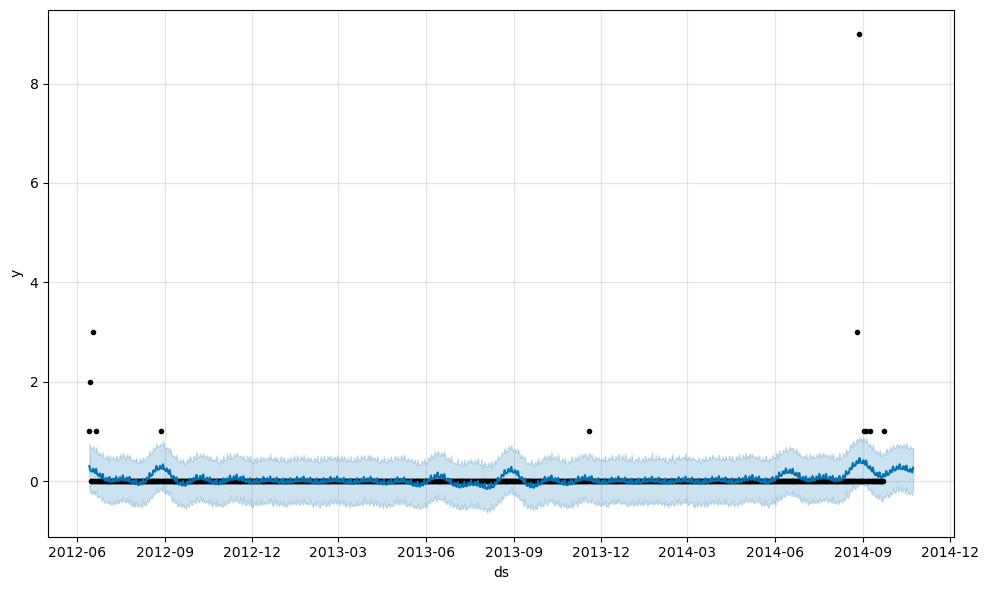

In [46]:
# Ensure the 'ds' column is in datetime format and remove timezone
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast the next 30 days
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)
plt.savefig('prophet_forecast.png')
plt.show()

### Ridge and Lasso Regression

In [20]:
# Check if daily_complaints is a DataFrame
print(type(daily_complaints))  # Should return 'pandas.core.frame.DataFrame'

# Check the first few rows to ensure it's structured correctly
print(daily_complaints.head())

<class 'pandas.core.frame.DataFrame'>
                             complaints lag_1 lag_2 lag_3 lag_4 lag_5 lag_6  \
_source_date_sent_to_company                                                  
2012-06-21 00:00:00+00:00             1     0     0     3     0     0     2   
2012-06-22 00:00:00+00:00             0     1     0     0     3     0     0   
2012-06-23 00:00:00+00:00             0     0     1     0     0     3     0   
2012-06-24 00:00:00+00:00             0     0     0     1     0     0     3   
2012-06-25 00:00:00+00:00             0     0     0     0     1     0     0   

                             lag_7  
_source_date_sent_to_company        
2012-06-21 00:00:00+00:00        1  
2012-06-22 00:00:00+00:00        2  
2012-06-23 00:00:00+00:00        0  
2012-06-24 00:00:00+00:00        0  
2012-06-25 00:00:00+00:00        3  


In [21]:
# Define the features (lagged complaints) and the target (current complaints)
X = daily_complaints.drop(columns=['complaints'])  # Lagged features
y = daily_complaints['complaints']  # Target

# Check shapes to ensure everything is correct
print(X.shape)  
print(y.shape)  

(832, 7)
(832,)


In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes to confirm the split
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(665, 7) (167, 7)
(665,) (167,)


In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Fit Ridge regression
ridge = Ridge(alpha=1.0)  # You can tune the alpha value for regularization strength
ridge.fit(X_train, y_train)

# Predict using Ridge model
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge MSE: {ridge_mse}')

# Fit Lasso regression
lasso = Lasso(alpha=0.1)  # You can tune the alpha value for regularization strength
lasso.fit(X_train, y_train)

# Predict using Lasso model
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso model
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso MSE: {lasso_mse}')

ValueError: setting an array element with a sequence.

In [24]:
X.dtypes

lag_1    object
lag_2    object
lag_3    object
lag_4    object
lag_5    object
lag_6    object
lag_7    object
dtype: object

In [25]:
X = X.apply(pd.to_numeric, errors='coerce')

In [26]:
X.dtypes

lag_1    float64
lag_2    float64
lag_3    float64
lag_4    float64
lag_5    float64
lag_6    float64
lag_7      int64
dtype: object

In [27]:
# Drop rows with NaN values in X and align y
X = X.dropna()
y = y[X.index]  

In [29]:
# Check y_test
print("y_test:")
print(y_test.head())
print("y_test type:", type(y_test))

y_test:
_source_date_sent_to_company
2014-04-12 00:00:00+00:00    0
2014-04-13 00:00:00+00:00    0
2014-04-14 00:00:00+00:00    0
2014-04-15 00:00:00+00:00    0
2014-04-16 00:00:00+00:00    0
Name: complaints, dtype: object
y_test type: <class 'pandas.core.series.Series'>


In [30]:
# Convert y_train and y_test to numeric
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Check the result after conversion
print("y_test after conversion:")
print(y_test.head())
print("y_test type after conversion:", type(y_test))

y_test after conversion:
_source_date_sent_to_company
2014-04-12 00:00:00+00:00    0.0
2014-04-13 00:00:00+00:00    0.0
2014-04-14 00:00:00+00:00    0.0
2014-04-15 00:00:00+00:00    0.0
2014-04-16 00:00:00+00:00    0.0
Name: complaints, dtype: float64
y_test type after conversion: <class 'pandas.core.series.Series'>


In [31]:
# Check y_pred_ridge after fitting Ridge model
print("y_pred_ridge:")
y_pred_ridge = ridge.predict(X_test)
print(y_pred_ridge[:5])  # Display the first 5 predictions
print("y_pred_ridge type:", type(y_pred_ridge))

y_pred_ridge:
[0.00238574 0.00238574 0.00238574 0.00238574 0.00238574]
y_pred_ridge type: <class 'numpy.ndarray'>


In [32]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for Ridge regression
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge MSE: {ridge_mse}')

ValueError: Input contains NaN.

In [33]:
# Check for NaN values in y_test
print("Are there NaN values in y_test?", y_test.isna().sum())

# Check for NaN values in y_pred_ridge
import numpy as np
print("Are there NaN values in y_pred_ridge?", np.isnan(y_pred_ridge).sum())

Are there NaN values in y_test? 1
Are there NaN values in y_pred_ridge? 0


In [34]:
# Remove NaN values from y_test and corresponding entries in X_test and y_pred_ridge
valid_indices = y_test.dropna().index  # Get indices of non-NaN values

In [35]:
# Filter y_test and y_pred_ridge to remove the NaN rows
y_test_cleaned = y_test.loc[valid_indices]
y_pred_ridge_cleaned = y_pred_ridge[valid_indices]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### Ridge regression model 

In [36]:
# Create a boolean mask for valid (non-NaN) values in y_test
valid_mask = y_test.notna()

# Filter y_test and y_pred_ridge using the boolean mask
y_test_cleaned = y_test[valid_mask]
y_pred_ridge_cleaned = y_pred_ridge[valid_mask]

# Now calculate MSE using the cleaned arrays
ridge_mse = mean_squared_error(y_test_cleaned, y_pred_ridge_cleaned)
print(f'Ridge MSE: {ridge_mse}')

Ridge MSE: 0.5214351128323322


#### Lasso Regression

In [37]:
# Predict using Lasso model
y_pred_lasso = lasso.predict(X_test)

# Filter y_pred_lasso using the same valid mask from y_test
y_pred_lasso_cleaned = y_pred_lasso[valid_mask]

# Now calculate MSE for Lasso
lasso_mse = mean_squared_error(y_test_cleaned, y_pred_lasso_cleaned)
print(f'Lasso MSE: {lasso_mse}')

NameError: name 'lasso' is not defined

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [39]:
lasso.fit(X_train, y_train)

NameError: name 'lasso' is not defined

In [40]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha value to tune regularization

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [41]:
# Predict using Lasso model
y_pred_lasso = lasso.predict(X_test)

# Filter y_pred_lasso using the same valid mask from y_test
y_pred_lasso_cleaned = y_pred_lasso[valid_mask]

# Calculate MSE for Lasso
lasso_mse = mean_squared_error(y_test_cleaned, y_pred_lasso_cleaned)
print(f'Lasso MSE: {lasso_mse}')

Lasso MSE: 0.5688360881542701


# Project: Advanced Forecasting Methods for Complaint Data

## Overview
This project applies three advanced forecasting methods on complaint data:
- **Prophet**: For capturing seasonality and trends in the time series data.
- **Ridge and Lasso Regression**: To predict complaint counts using lagged features while addressing multicollinearity.

## Findings

### 1. Prophet Model
- **Result**: The Prophet model performed well at capturing both seasonality and long-term trends. It handled missing data and temporal variations more effectively, producing a smooth forecast.

### 2. Ridge and Lasso Regression
- **Ridge MSE**: 0.5214
- **Lasso MSE**: 0.5688
- **Result**: Ridge outperformed Lasso in terms of Mean Squared Error. Both models can benefit from tuning the `alpha` parameter to further reduce overfitting and improve prediction performance.

## Conclusion
- **Prophet** was the most effective at capturing seasonality and trends in the complaint data.
- **Ridge** regression handled multicollinearity well and outperformed Lasso in this context.

